In [122]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer

In [40]:
df = pd.read_csv('/content/LuxuryLoanPortfolio.csv',usecols=['funded_amount', 'duration years',
       'duration months', '10 yr treasury index date funded',
       'interest rate percent', 'interest rate', 'payments',
       'total past payments', 'loan balance', 'property value',
       'employment length', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET',
       'TAX CLASS AT TIME OF SALE'])
df.head(4)

,funded_amount,duration years,duration months,10 yr treasury index date funded,interest rate percent,interest rate,payments,total past payments,loan balance,property value,employment length,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE
0,790000.0,20,240,1.96,3.359,0.03359,4524.65,92,373732.18,930250.0,6,1,0,0,2
1,1720000.0,15,180,2.21,3.508,0.03508,12302.74,62,957230.24,1995250.0,10,1,0,0,1
2,3720000.0,15,180,2.60,3.896,0.03896,27322.92,66,1916687.35,3881700.0,1,1,0,0,1
3,1079000.0,20,240,1.99,3.389,0.03389,6196.40,94,496538.75,1402450.0,17,1,0,0,2


In [37]:
pd.set_option('display.max_columns',None)

In [41]:
X = df.drop('loan balance',axis=1)
y = df['loan balance']

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)

In [48]:
lr = LinearRegression()

In [106]:
X_test['LAND SQUARE FEET'] = X_test['LAND SQUARE FEET'].apply(lambda x: x.replace('-','321'))

In [108]:
X_test['LAND SQUARE FEET'] = X_test['LAND SQUARE FEET'].astype(np.int32)

In [109]:
lr.fit(X_train,y_train)

LinearRegression()

In [110]:
lr.score(X_test,y_test)

0.9399155726636215

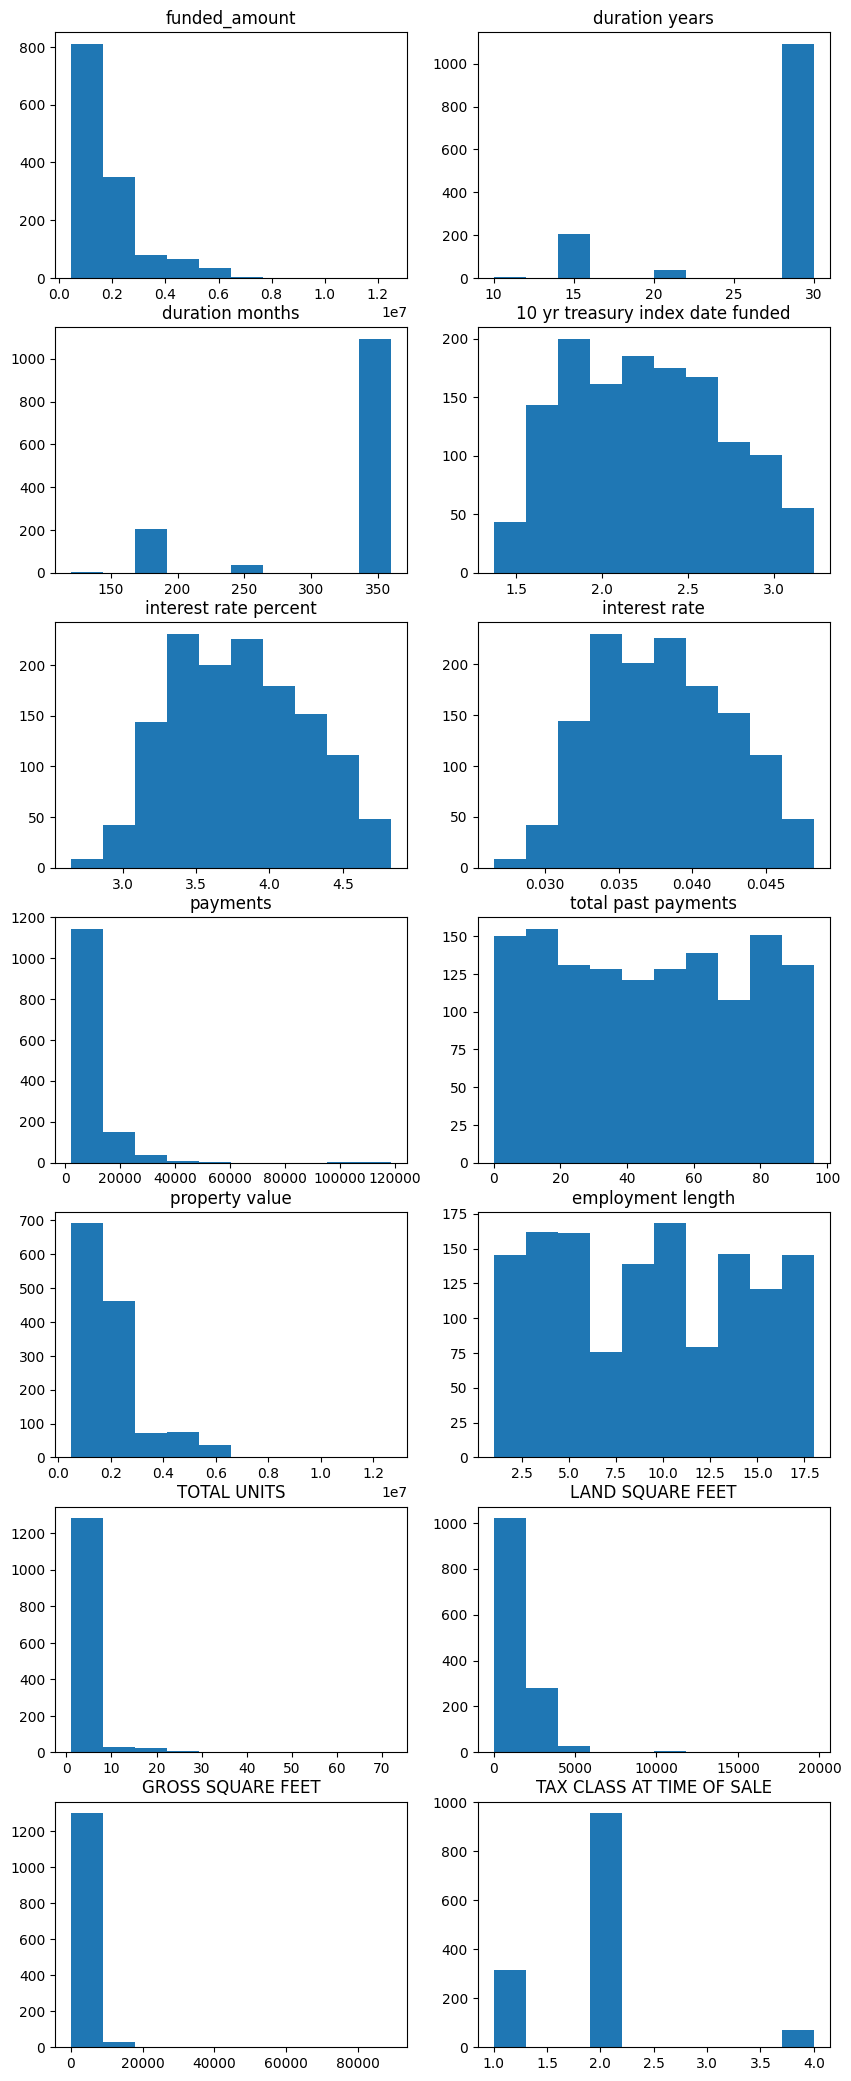

In [121]:
plt.figure(figsize=(10,30))
for i,col in enumerate(X_train.keys()):
  plt.subplot(8,2,i+1)
  plt.hist(X_train[col])
  plt.title(col)
plt.show()

In [123]:
trf = ColumnTransformer([
    ('width',KBinsDiscretizer(n_bins=10, encode='ordinal',strategy='uniform'),[6,7])
],remainder='passthrough')

In [124]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [125]:
lr.fit(X_train_trf,y_train)
lr.score(X_test_trf,y_test)

0.9924569901022305

Binarization

In [128]:
from sklearn.preprocessing import binarize

In [129]:
trf1 = ColumnTransformer([
    ('bina',binarize())
])

TypeError: ignored